In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import LSTM

In [2]:
stock = "GOOGL"
df = pd.DataFrame(yf.download(stock, '2010-01-01', '2022-12-31')["Close"])

[*********************100%***********************]  1 of 1 completed


In [3]:
def rolling(lag, data):
    A = []
    df = data.values
    for i in range(lag, len(df)):
        A.append(df[i-lag:i]) 
    return A

def train_test_split(x,y,test_size):
    i = int(len(x)*test_size)
    j = int(len(y)*test_size)
    return x[:i], x[i:], y[:j], y[j:]
               
def RNN(x, y, lag):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(lag,1)))
    model.add(Dropout(0.5))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.3))
    model.add(LSTM(units=50))
    model.add(Dropout(0.3))
    model.add(Dense(units=1))

    #RMSProp is working fine with LSTM but so do ADAM optimizer
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(np.array(x), np.array(y), epochs=100, batch_size=32)
    return model

In [4]:
lag = 5
A = rolling(lag, df["Close"])
b = df["Close"].values[lag::]

deon, dete, keyon, keyte = train_test_split(A,b, test_size=0.3)

In [5]:
a = RNN(deon,keyon,lag)

Epoch 1/100
31/31 [==============================] - 9s 24ms/step - loss: 179.0770
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 66.7945
Epoch 3/100
31/31 [==============================] - 0s 14ms/step - loss: 41.9076
Epoch 4/100
31/31 [==============================] - 0s 16ms/step - loss: 29.7247
Epoch 5/100
31/31 [==============================] - 0s 15ms/step - loss: 22.5775
Epoch 6/100
31/31 [==============================] - 0s 14ms/step - loss: 18.2097
Epoch 7/100
31/31 [==============================] - 0s 14ms/step - loss: 16.3667
Epoch 8/100
31/31 [==============================] - 0s 16ms/step - loss: 14.8624
Epoch 9/100
31/31 [==============================] - 0s 13ms/step - loss: 14.2102
Epoch 10/100
31/31 [==============================] - 0s 13ms/step - loss: 14.4669
Epoch 11/100
31/31 [==============================] - 0s 13ms/step - loss: 14.4014
Epoch 12/100
31/31 [==============================] - 0s 12ms/step - loss: 14.7809
Epoch 13/100

103/103 [==============================] - 2s 6ms/step


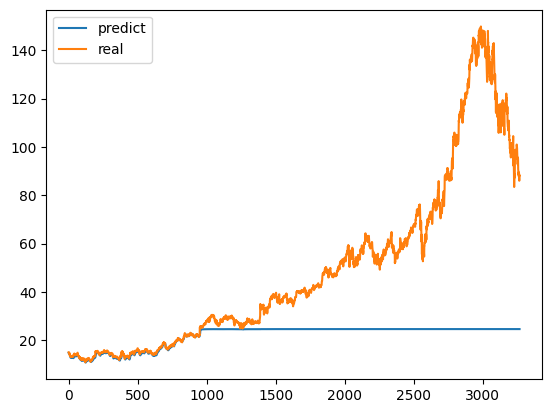

In [6]:
plt.plot(a.predict(np.array(A)), label="predict")
plt.plot(np.array(b), label="real")
plt.legend()
plt.show()